In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seed fro reproducibility
np.random.seed(42)

In [2]:
#create synythetic data
students = 40
study_hours = np.random.randint(1, 10, students)
job_hours = np.random.randint(0, 15, students)
sleep_hours = np.random.randint(4, 9, students)
extracurricullar = np.random.randint(0, 6, students)


# Exam score: positively influenced by study & sleep, negatively by job & extra activities

exam_score = (40
              +5*study_hours
              +2*sleep_hours
              -3*job_hours
              -1*extracurricullar
              +np.random.randint(-5, 5, students)
              )


data = pd.DataFrame({
    "study_hours":study_hours,
    "job_hours":job_hours,
    "sleep_hours":sleep_hours,
    "extracurricular_hours":extracurricullar,
    "exam_score":exam_score
})

In [3]:
data.head()

,study_hours,job_hours,sleep_hours,extracurricular_hours,exam_score
0,7,9,7,2,58
1,4,4,4,0,60
2,8,1,8,2,92
3,5,3,8,4,71
4,7,11,5,5,48


In [4]:
corr_correficient = data.corr()
corr_correficient

,study_hours,job_hours,sleep_hours,extracurricular_hours,exam_score
study_hours,1.000000,0.076427,0.155248,-0.118338,0.615404
job_hours,0.076427,1.000000,0.252023,-0.083942,-0.697643
sleep_hours,0.155248,0.252023,1.000000,-0.105864,0.093354
extracurricular_hours,-0.118338,-0.083942,-0.105864,1.000000,-0.086014
exam_score,0.615404,-0.697643,0.093354,-0.086014,1.000000


In [5]:
data.columns

Index(['study_hours', 'job_hours', 'sleep_hours', 'extracurricular_hours',
       'exam_score'],
      dtype='object')

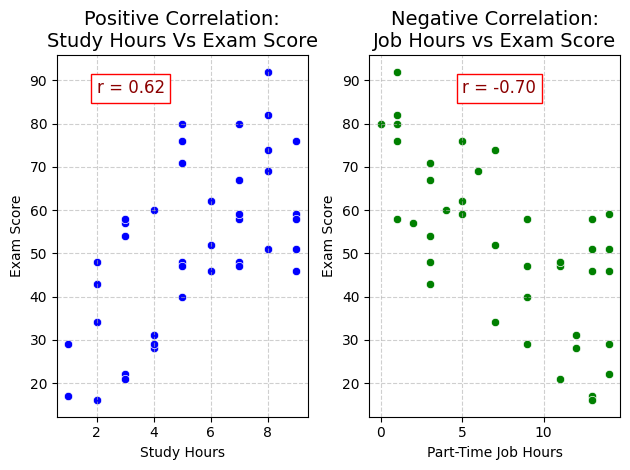

In [6]:
# Lets plot the realationship on a scatter plot
#Plot: Positive correlation: study vs score

plt.subplot(1, 2, 1)
sns.scatterplot(x="study_hours", y="exam_score", data=data,color="blue")
plt.title("Positive Correlation:\nStudy Hours Vs Exam Score",fontsize=14)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.text(2, max(data["exam_score"])-5,f"r = {data.corr().loc["study_hours","exam_score"]:.2f}",
         fontsize=12, color="darkred",bbox=dict(facecolor="white", edgecolor="red"))
plt.grid(True, linestyle="--", alpha=0.6)

# Negative correlation: Job vs Score
plt.subplot(1,2,2)
sns.scatterplot(x="job_hours",y="exam_score",data=data,color="green")
plt.title("Negative Correlation:\nJob Hours vs Exam Score", fontsize=14)
plt.xlabel("Part-Time Job Hours")
plt.ylabel("Exam Score")
plt.text(5, max(data["exam_score"])-5, f"r = {data.corr().loc["job_hours","exam_score"]:.2f}",
         fontsize=12, color="darkred", bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()



In [7]:
data.head()

,study_hours,job_hours,sleep_hours,extracurricular_hours,exam_score
0,7,9,7,2,58
1,4,4,4,0,60
2,8,1,8,2,92
3,5,3,8,4,71
4,7,11,5,5,48


In [8]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.6 MB 3.8 MB/s eta 0:00:03
   ----------------- ---------------------- 4.2/9.6 MB 8.7 MB/s eta 0:00:01
   ------------------------------------ --- 8.7/9.6 MB 12.1 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 12.8 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 12.8 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 12.8 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 6.8 MB/s  0:00:01

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------

In [9]:
import statsmodels.api as stm


# define variables for simple regression
X = data["study_hours"]
Y = data["exam_score"]

In [11]:
# add intercept (constant term)
X = stm.add_constant(X)

In [12]:
X.head()

,const,study_hours
0,1.0,7
1,1.0,4
2,1.0,8
3,1.0,5
4,1.0,7


In [13]:
# Fit model using OLS (Ordinary Least Squared)
model = stm.OLS(Y,X).fit()

In [14]:
#Display Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     23.16
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           2.38e-05
Time:                        12:57:26   Log-Likelihood:                -164.62
No. Observations:                  40   AIC:                             333.2
Df Residuals:                      38   BIC:                             336.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          26.5000      5.847      4.532      

C:\Users\ncc\AppData\Local\Temp\ipykernel_15140\1164176265.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(2, max(data["exam_score"])-5, f"Y = {model.params[0]:.2f} + {model.params[1]:.2f}X", color="red", fontsize=12)


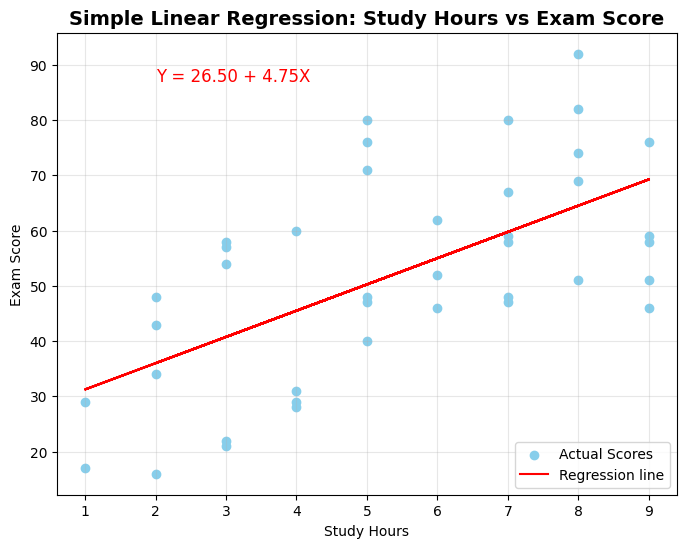

In [20]:
# lets have the regression plot using regression line and scatter plot
plt.figure(figsize=(8,6))
plt.scatter(data["study_hours"],data["exam_score"], color="skyblue",label="Actual Scores")
plt.plot(data["study_hours"],model.predict(X),color="red",label="Regression line")
plt.title("Simple Linear Regression: Study Hours vs Exam Score", fontsize=14, weight="bold")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.text(2, max(data["exam_score"])-5, f"Y = {model.params[0]:.2f} + {model.params[1]:.2f}X", color="red", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [21]:
prediction = model.predict(X)
prediction

0     59.75
1     45.50
2     64.50
3     50.25
4     59.75
5     40.75
6     59.75
7     64.50
8     50.25
9     45.50
10    64.50
11    64.50
12    40.75
13    55.00
14    50.25
15    36.00
16    64.50
17    55.00
18    36.00
19    50.25
20    31.25
21    55.00
22    69.25
23    31.25
24    40.75
25    59.75
26    45.50
27    69.25
28    40.75
29    50.25
30    40.75
31    59.75
32    50.25
33    69.25
34    59.75
35    36.00
36    45.50
37    69.25
38    36.00
39    69.25
dtype: float64

In [24]:
data["predicted_exam_score"] = prediction

data["squared_error"] = (data["exam_score"] - data["predicted_exam_score"]) **2


data[["study_hours", "exam_score","predicted_exam_score", "squared_error"]]

,study_hours,exam_score,predicted_exam_score,squared_error
0,7,58,59.75,3.0625
1,4,60,45.50,210.2500
2,8,92,64.50,756.2500
3,5,71,50.25,430.5625
4,7,48,59.75,138.0625
5,3,22,40.75,351.5625
6,7,47,59.75,162.5625
7,8,69,64.50,20.2500
8,5,48,50.25,5.0625
9,4,31,45.50,210.2500


In [26]:
# Define predictors (independent variables)
X = data[["study_hours", "job_hours", "sleep_hours","extracurricular_hours"]]

In [27]:
X.head()

,study_hours,job_hours,sleep_hours,extracurricular_hours
0,7,9,7,2
1,4,4,4,0
2,8,1,8,2
3,5,3,8,4
4,7,11,5,5


In [28]:
# Add constant term (intercept)
X = stm.add_constant(X)

In [29]:
# Define dependent variable
y = data["exam_score"]

In [30]:
y.head()

0    58
1    60
2    92
3    71
4    48
Name: exam_score, dtype: int32

In [35]:
model_mlr = stm.OLS(y,X).fit()

In [36]:
model_mlr.params

const                    37.938903
study_hours               4.942264
job_hours                -3.181857
sleep_hours               2.342957
extracurricular_hours    -0.668350
dtype: float64

`Predicted Exam Score =37.94 +4.94(Study Hours) − 3.18(Job Hours) + 2.34(Sleep Hours) − 0.67(Extracurricular Hours)`

| Coefficient                       | Meaning                       | Interpretation                                                                                                                                                                       |
| --------------------------------- | ----------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **const = 37.94**                 | The intercept (constant term) | If a student does **0 hours** of study, job, sleep, and extracurriculars, their baseline exam score is **37.94**. It’s the model’s predicted starting point.                         |
| **Study Hours = +4.94**           | Positive relationship         | Each **additional hour of study** is expected to **increase** the exam score by about **4.94 points**, holding all other factors constant.                                           |
| **Job Hours = -3.18**             | Negative relationship         | Each **additional hour spent working a job** is expected to **decrease** exam score by about **3.18 points**, all else equal (since more job hours might reduce study time or rest). |
| **Sleep Hours = +2.34**           | Positive relationship         | Each **extra hour of sleep** increases exam score by about **2.34 points**, holding other variables constant.                                                                        |
| **Extracurricular Hours = -0.67** | Negative relationship         | Each **extra hour spent on extracurricular activities** reduces exam score by about **0.67points**, likely because it cuts into study or rest time.                                 |

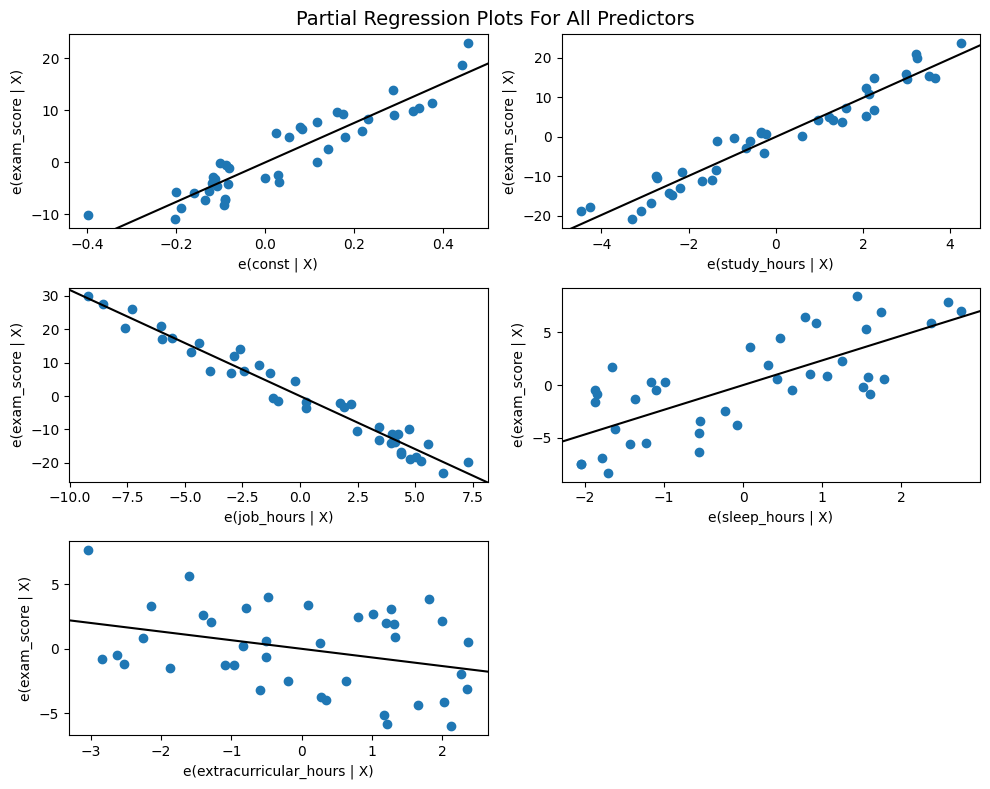

In [37]:
fig = plt.figure(figsize=(10,8))

stm.graphics.plot_partregress_grid(model_mlr, fig=fig)
plt.suptitle("Partial Regression Plots For All Predictors", fontsize=14)
plt.show()

In [38]:
print(model_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     329.4
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           3.03e-27
Time:                        14:25:37   Log-Likelihood:                -101.05
No. Observations:                  40   AIC:                             212.1
Df Residuals:                      35   BIC:                             220.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    37.93

In [ ]:
# lets have the regression plot using  regression line and scatter plot
plt.figure(figsize=(8,6))
plt.scatter(data['Study Hours'], data['Exam Score'], color='skyblue', label='Actual Scores')
plt.plot(data['Study Hours'], model.predict(X), color='red', label='Regression Line')

# Annotate
plt.title('Simple Linear Regression: Study Hours vs Exam Score', fontsize=14, weight='bold')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.text(2, max(data['Exam Score'])-5, f'Y = {model.params[0]:.2f} + {model.params[1]:.2f}X', color='red', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

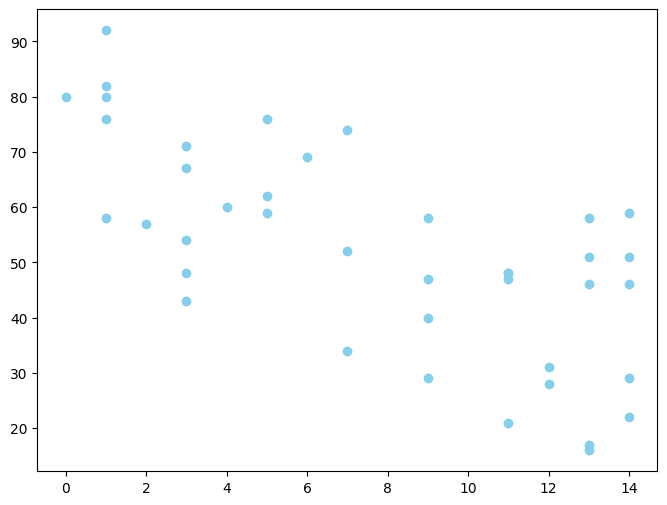

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=data["job_hours"], y=y, color="skyblue", label='Actual Scores')
plt.plot(data["job_hours"], model_mlr.predict(X))

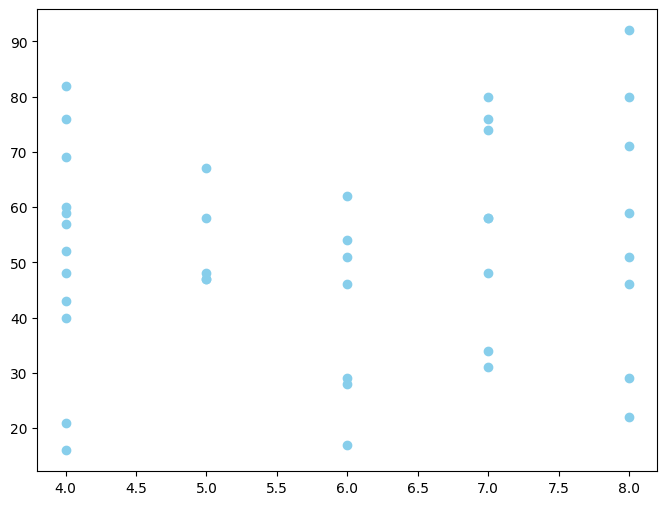

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(x=data["sleep_hours"], y=y, color="skyblue")